<a href="https://colab.research.google.com/github/orlandokohjy/Etiqa-Data_Scientist/blob/main/0_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 - Exploratory Data Analysis
This section is to look into the time series data
- time series plotting
- heatmap plotting

In [ ]:
# connect to gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive

/gdrive


In [55]:
import datetime as dt
dt.datetime.strptime('21-1-2013', '%d-%m-%Y')
parser = lambda date: pd.datetime.strptime(date, '%Y-%m-%d')

datetime.datetime(2013, 1, 21, 0, 0)

In [92]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df_call = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/KJY/Data Science/Data_Scientist_Position_at_Etiqa_Insurance_Singapore/case_data_calls.csv', 
                      delimiter=';',
                      parse_dates=True,)
df_res = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/KJY/Data Science/Data_Scientist_Position_at_Etiqa_Insurance_Singapore/case_data_reservations.csv',
                     delimiter=';', 
                     parse_dates=True,)

# standardize the date format
df_call['date'] = pd.to_datetime(df_call['date'], format='%d-%m-%Y')
df_res['date'] = pd.to_datetime(df_res['date'], format='%d-%m-%Y')


In [93]:
df_res.head()

,date,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
0,2014-01-01,1494,7794,0,1,1
1,2014-01-02,2891,20074,0,1,0
2,2014-01-03,2790,17905,0,1,0
3,2014-01-04,2504,10880,0,0,0
4,2014-01-05,1522,8333,0,0,0


In [94]:
print(df_call.shape, df_res.shape)

(1155, 3) (790, 6)


In [95]:
# check whether there is duplicate in dates
check_call = df_call['date'].groupby(df_call['date']).nunique().sum()
check_res = df_res['date'].groupby(df_res['date']).nunique().sum()
print(check_call, check_res)

1155 790


In [113]:
# merge both dataframes for easy manipulation
merge_df = df_call.merge(df_res, how='outer', on='date', validate='one_to_one')
merge_df.set_index('date', drop=True, inplace=True)

In [114]:
merge_df

,calls,weekday,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
date,,,,,,,
2013-01-01,2429,2,NaN,NaN,NaN,NaN,NaN
2013-01-02,3881,3,NaN,NaN,NaN,NaN,NaN
2013-01-03,3560,4,NaN,NaN,NaN,NaN,NaN
2013-01-04,3155,5,NaN,NaN,NaN,NaN,NaN
2013-01-05,1538,6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2016-02-25,5690,4,4713.0,33309.0,0.0,0.0,0.0
2016-02-26,5799,5,5204.0,34350.0,0.0,0.0,0.0
2016-02-27,3949,6,5135.0,23656.0,0.0,0.0,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f16c082af50>,
      dtype=object)

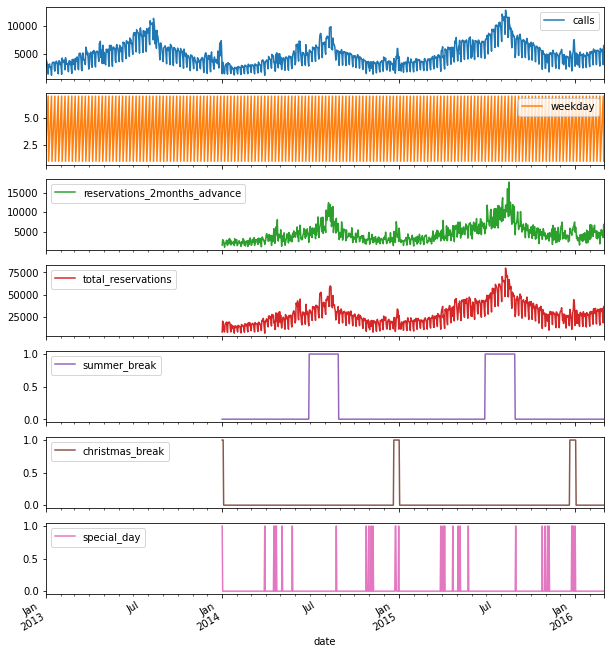

In [115]:
merge_df.plot(subplots=True, figsize=(10,12))

In [117]:
# Try resampling to weekly and monthly data
merge_df_week = merge_df.resample('W').mean()
merge_df_month = merge_df.resample('M').mean()

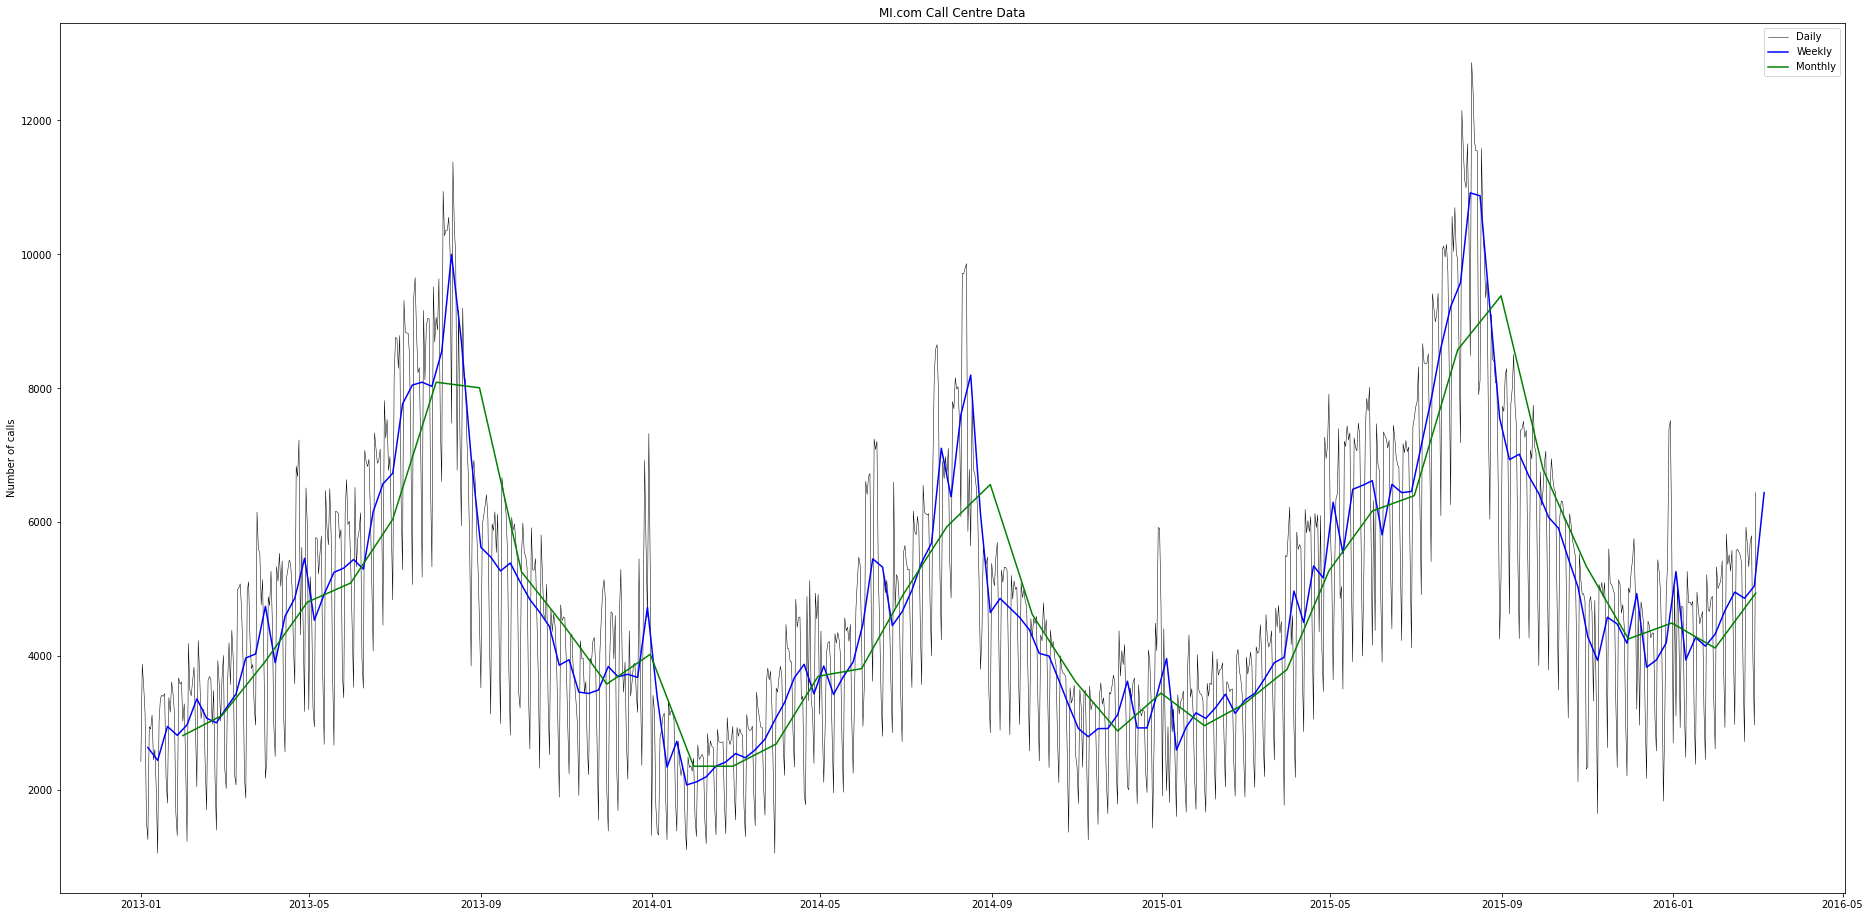

In [128]:
# Plot daily, weekly and monthly data
fig, ax = plt.subplots(figsize=(32,16))

ax.plot(merge_df.index, merge_df['calls'], label='Daily', linestyle='-', linewidth=0.5, color='black')
ax.plot(merge_df_week.index, merge_df_week['calls'], label='Weekly', color='blue')
ax.plot(merge_df_month.index, merge_df_month['calls'], label='Monthly', color='green')
ax.set_ylabel('Number of calls')
ax.set_title('MI.com Call Centre Data')
ax.legend()

In [132]:
merge_df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-02-20', '2016-02-21', '2016-02-22', '2016-02-23',
               '2016-02-24', '2016-02-25', '2016-02-26', '2016-02-27',
               '2016-02-28', '2016-02-29'],
              dtype='datetime64[ns]', name='date', length=1155, freq=None)

Text(0.5, 1.0, 'Average Calls (in thousands)')

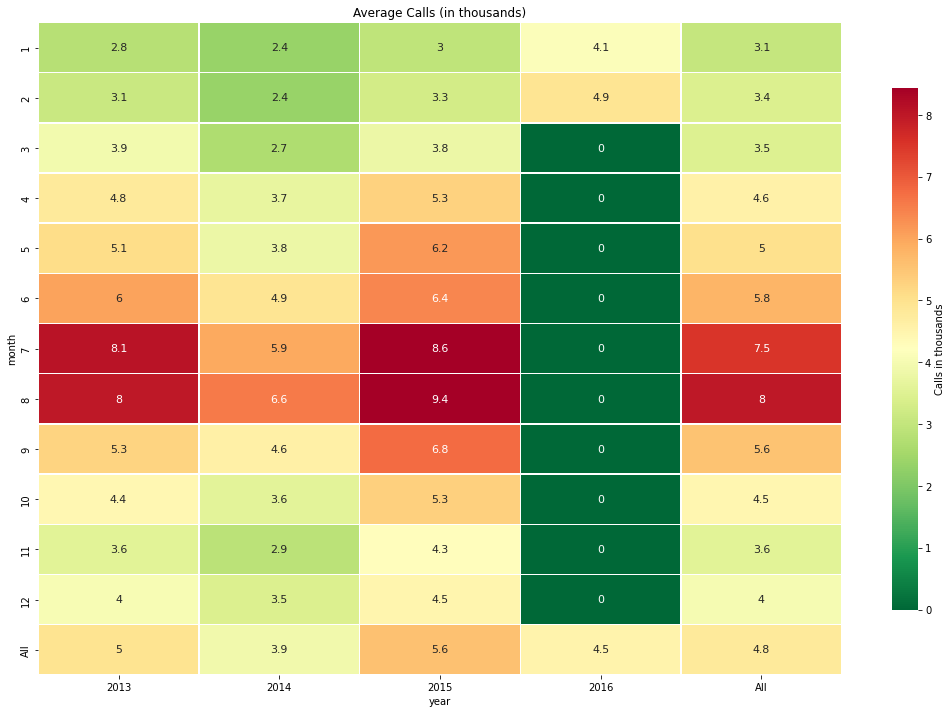

In [146]:
# Plot a heatmap
merge_df['month'] = merge_df.index.month
merge_df['year'] = merge_df.index.year
merge_df['new_calls'] = merge_df['calls']/1000
new_df = pd.pivot_table(merge_df, values='new_calls', index=['month'], columns=['year'], fill_value=0, margins=True)

fig, ax = plt.subplots(figsize=(18, 12))
hm = sns.heatmap(new_df, cmap='RdYlGn_r', robust=True, annot=True, linewidths=0.5, annot_kws={'size':11},
                 cbar_kws={'shrink':0.8, 'label':'Calls in thousands'})
plt.title('Average Calls (in thousands)')

In [107]:
# def time series plot
def plot_ts(x, y, data, title, xlabel, ylabel):
  fig, ax = plt.subplots(figsize=(20,14))
  ax.plot(data[x], data[y])
  ax.set_title(title)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  plt.show()

In [110]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(merge_df['calls'])
resplot = res.plot()


AttributeError: ignored

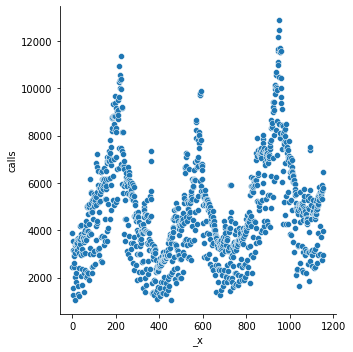

In [80]:
import seaborn as sns

sns.relplot(x=df_call.index, y='calls', data=df_call)
plt.show()

In [147]:
# export as picke
merge_df.to_pickle('/content/drive/Othercomputers/My MacBook Pro/KJY/Data Science/Data_Scientist_Position_at_Etiqa_Insurance_Singapore/0-df.pkl')

In [ ]:
#